# 头文件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 数据载入

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')
train_df.tail()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.describe(include=np.number) #"all", np.number, np.object
train_df.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Mrs. Emil (Tillie Mandelbaum)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 数据处理和特征分析

## 基本分析

In [7]:
#Saving Ids
train_ID = train_df['PassengerId']
test_ID = test_df['PassengerId']
#Dropping Ids
train_df.drop("PassengerId", axis = 1, inplace = True)
test_df.drop("PassengerId", axis = 1, inplace = True)

In [8]:
# 统计标签
target = train_df['Survived']
target.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [9]:
corrmat = train_df.corr()
corrmat

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


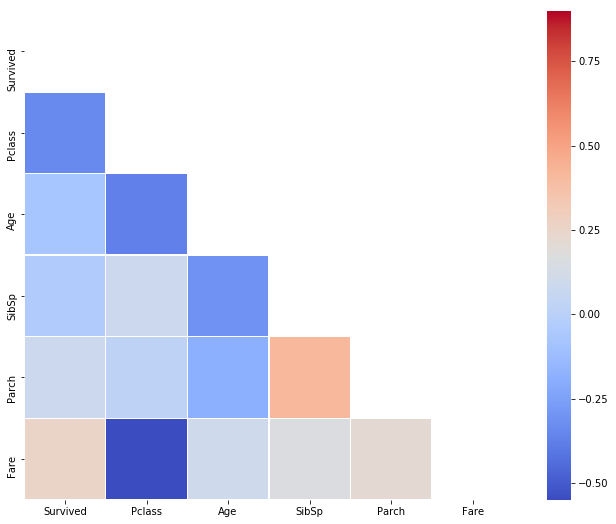

In [10]:
# 绘制热力图
mask = np.zeros_like(corrmat) # 返回相同大小的0矩阵
mask[np.triu_indices_from(mask)] = True # triu_indices_from: 函数的上三角矩阵

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, mask=mask, linewidths=.5, vmax=0.9, square=True, cmap="coolwarm") #YlGnBu
#sns.heatmap(corrmat, linewidths=.5, vmax=0.9, square=True, cmap="coolwarm")

## Train Test 合并

In [11]:
size_train_df = train_df.shape[0] 
data = pd.concat((train_df, test_df),sort=False).reset_index(drop=True)
data.drop(['Survived'], axis=1, inplace=True)
# 有些地方可以查看data整体信息，所以先合并

## 缺失值

In [12]:
# train_df.isnull().sum()
# test_df.isnull().sum()
data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [13]:
# 可以考虑去掉的特征
# train_df = train_df.drop(['Ticket','Cabin'], axis=1) 
# test_df = test_df.drop(['Ticket','Cabin'], axis=1)
# data = data.drop(['Ticket','Cabin'], axis=1)

## 相关性分析

In [14]:
from sklearn.feature_selection import chi2 , f_classif, f_regression
# 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
# 'Survived'
feature_class = ['Sex', 'Embarked']
feature_continuous = ['Age', 'Fare', 'Pclass']
train_df = train_df[train_df.isnull()==False]

# ----需要特征转换为数值形式，并填补缺失值之后才能做----
# for fcol in feature_class:
#     print( fcol, chi2(train_df[[fcol]], train_df['Survived']))
# for fcol in feature_continuous:
#     print( fcol, f_classif(train_df[[fcol]], train_df['Survived']))

### 性别Sex

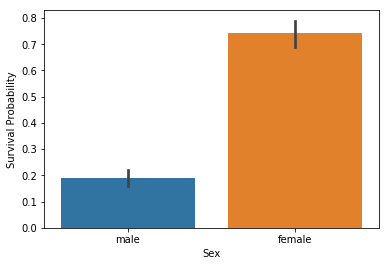

In [15]:
# 类别特征
g=sns.barplot(data=train_df,x="Sex",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()
# -----------pandas实现，相对麻烦
# plt.figure()
# pd.crosstab(train_df['Survived'],train_df['Sex']).plot(kind = 'bar')
# t1 = pd.crosstab(train_df['Survived'],train_df['Sex'])
# t1["sum1"]=t1.sum(1)
# t1=t1.div(t1.sum1,axis = 0)
# t1.drop("sum1",1).plot(kind = 'bar',stacked= True)

In [16]:
# 测试相关性
def testcorr(fcol, cortype = 'f', usedummy = True):
    t1 = train_df[[fcol, 'Survived']].dropna() #临时dropno
    if usedummy:
        t2 = pd.get_dummies(t1[[fcol]]) #对类别临时dummy
    else:
        t2 = t1[[fcol]]
    if cortype == 'f': #连续
        score = f_classif(t2, t1['Survived'])
    else:
        score = chi2(t2, t1['Survived'])
    print( ' Score', score[0])
    print( 'Pvalue', score[1])

In [17]:
testcorr('Sex')

 Score [372.40573 372.40573]
Pvalue [0. 0.]


In [18]:
#进一步查看
print(train_df[["Sex","Survived"]].groupby("Sex").mean())

        Survived
Sex             
female  0.742038
male    0.188908


### 年龄Age

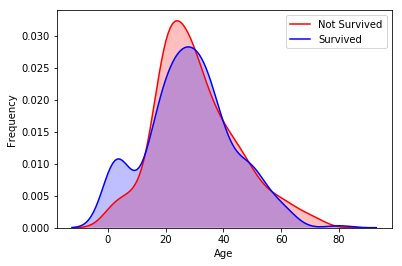

In [19]:
# 数值特征--拟合曲线分布查看
fcol = 'Age'
g=sns.kdeplot(train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==0)],color="Red",shade=True)
g=sns.kdeplot(train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==1)],color="Blue",shade=True,ax=g)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived","Survived"])
plt.show()

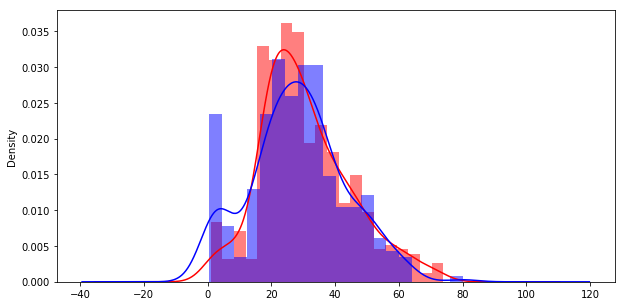

In [20]:
# plt方式，简单查看
fcol = 'Age'
plt.figure(figsize=(10, 5))
t0 = train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==0)]
t1 = train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==1)]
t0.plot.kde(color="Red")
t1.plot.kde(color="Blue")
# ---hist
num_bins = 20
g=plt.hist(t0, num_bins, density=1, facecolor='red', alpha=0.5)
g=plt.hist(t1, num_bins, density=1, facecolor='blue', alpha=0.5)

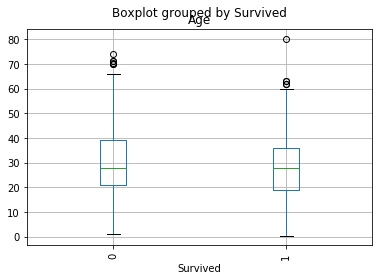

In [21]:
# 数值特征分布查看
fcol = ['Age']
train_df.boxplot(column=fcol, by= 'Survived',rot=90)

In [23]:
# 测试相关性
fcol = 'Age'
testcorr(fcol, 'f', False)

 Score [4.27119493]
Pvalue [0.03912465]


#### 缺失值处理

In [24]:
train_df.Age.median(),test_df.Age.median()

(28.0, 27.0)

In [25]:
# 年龄处理 ---中位数 或者 均值 取整
meanAge = data.Age.median()
data.Age = data.Age.fillna(meanAge)
train_df.Age = train_df.Age.fillna(meanAge)
test_df.Age = test_df.Age.fillna(meanAge)
# ---也可以更详细处理---利用和年龄有关的特征填充---

### SibSp  
船上兄弟姐妹或配偶数量

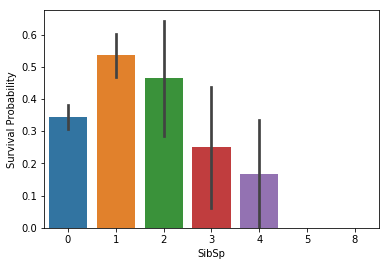

In [26]:
# 类别特征
g=sns.barplot(data=train_df,x="SibSp",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()

In [27]:
# 测试相关性
fcol = 'SibSp'
# train_df['new'] = train_df[fcol].astype('str')
# testcorr('new', 'f', True ) #非str类型，不能自动使用dummy
testcorr(fcol, 'f', False ) 

 Score [1.1105722]
Pvalue [0.29224393]


### Parch  
船上父母或子女数量

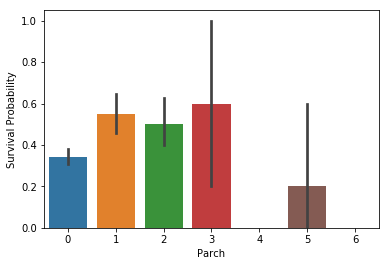

In [28]:
# 类别特征
g=sns.barplot(data=train_df,x="Parch",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()

In [29]:
# 测试相关性
fcol = 'Parch'
t1 = train_df[[fcol, 'Survived']].dropna() #临时dropno
t2 = pd.get_dummies(t1[[fcol]]) #对类别临时dummy
print( fcol, f_classif(t2, t1['Survived']))

Parch (array([5.96346384]), array([0.01479925]))


### 船票等级Pclass

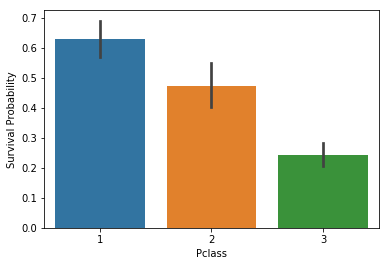

In [30]:
g=sns.barplot(data=train_df,x="Pclass",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()

In [31]:
# 测试相关性
fcol = 'Pclass'
t1 = train_df[[fcol, 'Survived']].dropna() #临时dropno
t2 = pd.get_dummies(t1[[fcol]].astype('str')) #对类别临时dummy
print( fcol, f_classif(t2, t1['Survived']))
print( fcol, chi2(t2, t1['Survived']))

Pclass (array([ 79.13641  ,   7.8147917, 103.05747  ], dtype=float32), array([3.190567e-18, 5.293693e-03, 5.510598e-23], dtype=float32))
Pclass (array([55.17515099,  6.16076687, 41.55307089]), array([1.10253810e-13, 1.30614569e-02, 1.14714147e-10]))


### 票价Fare

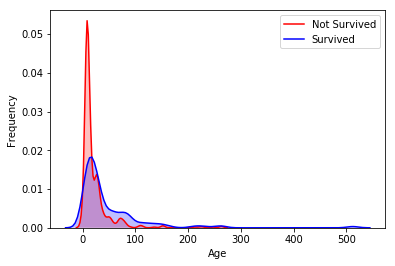

In [32]:
# 数值特征--拟合曲线分布查看
fcol = 'Fare'
g=sns.kdeplot(train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==0)],color="Red",shade=True)
g=sns.kdeplot(train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==1)],color="Blue",shade=True,ax=g)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived","Survived"])
plt.show()

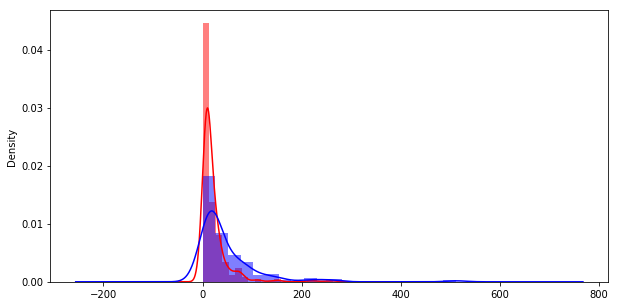

In [34]:
# plt方式，简单查看
fcol = 'Fare'
plt.figure(figsize=(10, 5))
t0 = train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==0)]
t1 = train_df[fcol][(train_df[fcol].notnull())&(train_df["Survived"]==1)]
t0.plot.kde(color="Red")
t1.plot.kde(color="Blue")
# ---hist
num_bins = 20
g=plt.hist(t0, num_bins, density=1, facecolor='red', alpha=0.5)
g=plt.hist(t1, num_bins, density=1, facecolor='blue', alpha=0.5)

In [35]:
#计算偏度
from scipy.stats import skew, kurtosis
skew(train_df[fcol]), train_df[fcol].skew()
#kurtosis(train_df[fcol]), train_df[fcol].kurt()

(4.7792532923723545, 4.787316519674893)

In [36]:
# 测试相关性
fcol = 'Fare'
t1 = train_df[[fcol, 'Survived']].dropna() #临时dropno
t2 = t1[[fcol]]
print( fcol, f_classif(t2, t1['Survived']))
print( fcol, chi2(t2, t1['Survived']))

Fare (array([63.03076423]), array([6.12018934e-15]))
Fare (array([4518.31909064]), array([0.]))


#### 缺失值处理  
因为后面需要进行log变换，所以先进行缺失值处理

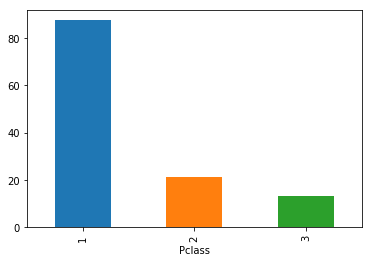

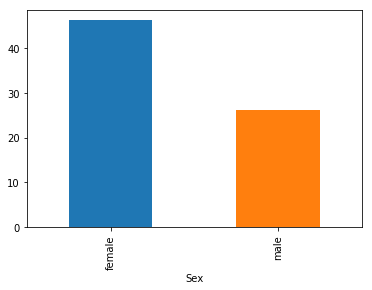

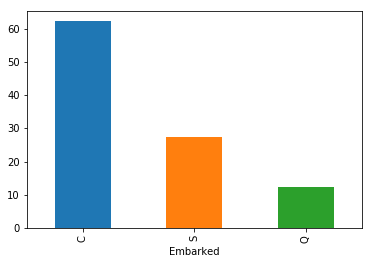

In [37]:
# Fare分析
for col in ['Pclass', 'Sex', 'Embarked']:
        plt.figure()
        data.groupby(col).Fare.mean().sort_values(ascending=False).plot(kind="bar")
        data.groupby(col).Fare.mean()

In [38]:
# Fare处理---均值 或 中位数
FarebyPclass = data.groupby('Pclass').Fare.median()
FareMedian = data["Pclass"].apply(lambda x: FarebyPclass[x])

In [39]:
data[data.Fare.isnull()]
data.loc[1043:1043]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [40]:
data.Fare.fillna(value = FareMedian, inplace=True)
test_df.Fare.fillna(value = FareMedian, inplace=True)

#### 分布长尾，可以考虑进行log变换  
票价的分布存在长尾，相对正态分布严重偏斜，这种分布在很多算法中会导致该特征产生过高的权重（高于它应该享有的待遇）  
对该特征应进行log1p变换可以纠正偏斜。

In [41]:
train_df[fcol + '_Log1p'] = np.log1p(train_df[fcol]) 
test_df[fcol + '_Log1p'] = np.log1p(test_df[fcol]) 
data[fcol + '_Log1p'] = np.log1p(data[fcol]) 

fcol1 = fcol + '_Log1p'
skew(train_df[fcol1]), train_df[fcol1].skew()

(0.39426283638993376, 0.3949280095189306)

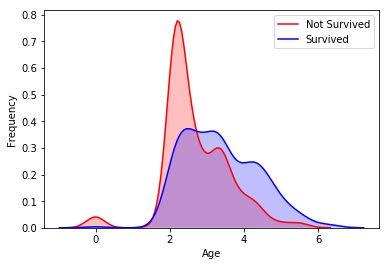

In [42]:
g=sns.kdeplot(train_df[fcol1][(train_df[fcol1].notnull())&(train_df["Survived"]==0)],color="Red",shade=True)
g=sns.kdeplot(train_df[fcol1][(train_df[fcol1].notnull())&(train_df["Survived"]==1)],color="Blue",shade=True,ax=g)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Not Survived","Survived"])
plt.show()

In [43]:
# 测试相关性
t1 = train_df[[fcol1, 'Survived']].dropna() #临时dropno
t2 = t1[[fcol1]]
print( fcol, f_classif(t2, t1['Survived']))
print( fcol, chi2(t2, t1['Survived']))

Fare (array([108.54151903]), array([4.64667029e-24]))
Fare (array([30.69903038]), array([3.01315582e-08]))


### 登录港口Embarked

#### 缺失值处理

In [44]:
print(data["Embarked"].describe())

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object


In [45]:
data[data.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Log1p
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,4.394449
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,4.394449


In [46]:
data[(data.Fare<82)&(data.Fare>79)].sort_values(by='Fare')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Log1p
139,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,4.384524
256,1,"Thorne, Mrs. Gertrude Maybelle",female,28.0,0,0,PC 17585,79.2000,NaN,C,4.384524
587,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,4.384524
789,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,4.384524
1218,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.2000,NaN,C,4.384524
1288,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C,4.384524
262,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S,4.390119
558,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S,4.390119
585,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S,4.390119
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,4.394449


In [47]:
#data.Embarked.fillna('S',inplace=True)
data.Embarked.fillna(data["Embarked"].describe().top,inplace=True)
train_df.Embarked.fillna(data["Embarked"].describe().top,inplace=True)
test_df.Embarked.fillna(data["Embarked"].describe().top,inplace=True)

#### 分析

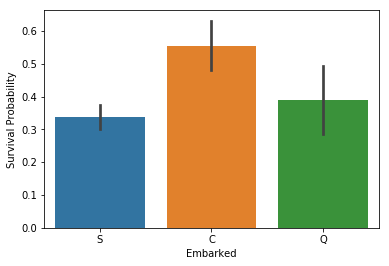

In [48]:
fcol = 'Embarked'
g=sns.barplot(data=train_df,x=fcol,y="Survived")
g.set_ylabel("Survival Probability")
plt.show()
# ---C生还率较高

In [49]:
# 测试相关性
fcol = 'Embarked'
t1 = train_df[[fcol, 'Survived']].dropna() #临时dropno
t2 = pd.get_dummies(t1[[fcol]]) #对类别临时dummy
print( fcol, chi2(t2, t1['Survived']))

Embarked (array([2.04644013e+01, 1.08467891e-02, 5.48920482e+00]), array([6.07507131e-06, 9.17051963e-01, 1.91342437e-02]))


In [50]:
# 进一步查看 Pclasst和Embarked的关系
g=sns.catplot(data=train_df,x="Pclass",col="Embarked",height=3,kind="count",palette="muted")
g = g.set_ylabels("Count")
plt.show()

AttributeError: module 'seaborn' has no attribute 'catplot'

### 船舱Cabin

In [51]:
print(data["Cabin"].describe())
print('null num is', data["Cabin"].isnull().sum())

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object
null num is 1014


In [52]:
# 确实太多，直接填补为X，也可以考虑去掉，但是先填充看是否有相关性，因为舱位信息可能有用
data["Cabin"].fillna('X', inplace=True)
train_df["Cabin"].fillna('X', inplace=True)
test_df["Cabin"].fillna('X', inplace=True)

In [53]:
# 其他Cabin，经观察数据，可以发现同字母开头的应该舱位类似，所以进行合并
data["Cabin"] = data["Cabin"].str[0]
train_df["Cabin"] = train_df["Cabin"].str[0]

In [54]:
data["Cabin"].groupby(data["Cabin"]).count()

Cabin
A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
X    1014
Name: Cabin, dtype: int64

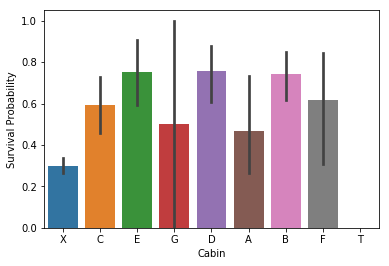

In [55]:
# 类别特征
g=sns.barplot(data=train_df,x="Cabin",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()

In [56]:
# 测试相关性
fcol = 'Cabin'
t1 = train_df[[fcol, 'Survived']].dropna() #临时dropno
t2 = pd.get_dummies(t1[[fcol]]) #对类别临时dummy
print( fcol, f_classif(t2, t1['Survived']))
print( fcol, chi2(t2, t1['Survived']))

Cabin (array([ 0.4417937 , 28.117224  , 11.841658  , 20.663183  , 19.17922   ,
        2.9939399 ,  0.22878735,  0.6226867 , 99.25299   ], dtype=float32), array([5.0643033e-01, 1.4415870e-07, 6.0618838e-04, 6.2331496e-06,
       1.3316546e-05, 8.3923630e-02, 6.3254207e-01, 4.3026105e-01,
       3.0911039e-22], dtype=float32))
Cabin (array([ 0.43511648, 25.87558056, 10.9367295 , 19.48964625, 18.14063848,
        2.9469702 ,  0.22821398,  0.62295082, 20.48831435]), array([5.09488990e-01, 3.64146757e-07, 9.42764388e-04, 1.01146449e-05,
       2.05175592e-05, 8.60387225e-02, 6.32851311e-01, 4.29952852e-01,
       5.99964246e-06]))


### 姓名Name

In [57]:
print(train_df["Name"].describe())

count                                        891
unique                                       891
top       Taussig, Mrs. Emil (Tillie Mandelbaum)
freq                                           1
Name: Name, dtype: object


## 特征提取

In [58]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Log1p
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,2.110213
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4.280593
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,2.188856
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,3.990834
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,2.202765


### 从Name中获取头衔

In [466]:
def name_extract(word):
    return word.split(',')[1].split('.')[0].strip()

In [467]:
dfTitle = pd.DataFrame({'Title':data['Name'].apply(name_extract)})

In [468]:
dfTitle.groupby('Title').Title.count()

Title
Capt              1
Col               4
Don               1
Dona              1
Dr                8
Jonkheer          1
Lady              1
Major             2
Master           61
Miss            260
Mlle              2
Mme               1
Mr              757
Mrs             197
Ms                2
Rev               8
Sir               1
the Countess      1
Name: Title, dtype: int64

In [469]:
dfTitle.describe()

,Title
count,1309
unique,18
top,Mr
freq,757


In [470]:
# 可以把特殊称谓的人归为一类，也可以保留
# 以下归为一类
TitleNormal = ['Mr', 'Mrs', 'Miss', 'Master'] #保留4个人数最多的称谓
titleSimple = dfTitle.Title.apply(lambda x: x if x in TitleNormal else "other")
titleSimple.groupby(titleSimple).count()

Title
Master     61
Miss      260
Mr        757
Mrs       197
other      34
Name: Title, dtype: int64

#### Title 相关意义  
Capt，船长
Col, Colonel，上校  
Don，n. <西>（置于男士名字前的尊称）先生，堂  
Dona，是西班牙语对女子的称谓，相当于英语的 Lady  
Dr.= doctor，医生/博士  
Lady, 女士，指成年女子，有些人尤其是长者认为这样说比较礼貌  
Jonkheer是贵族  
Major，意思有少校人意思  
Master，佣人对未成年男少主人的称呼,相当于汉语的"少爷"。  
Mr.= mister，先生  
Mrs.= mistress，太太/夫人  
Miss,复数为misses，对未婚妇女用,  
Ms.或Mz，美国近来用来称呼婚姻状态不明的妇女  
Mme, Madame简写是Mme.,复数是mesdames(简写是Mme)  
Mlle,小姐  
Rev.= reverend，用于基督教的牧师，如the Rev. Mr.Smith  
The Countless，女伯爵

In [471]:
#将title按意义合并为几个组
dfTitle=dfTitle.replace(['Mr','Don'],'Mr')
dfTitle=dfTitle.replace(['Mrs','Miss','Mme','Ms','Lady','Dona','Mlle'],'Ms')
# dfTitle=dfTitle.replace(['Sir','Major','Col','Capt'],'Major') #Capt 和 Rev明显类似
dfTitle=dfTitle.replace(['Master','Jonkheer','the Countess'],'Jonkheer')
# dfTitle=dfTitle.replace(['Rev','Dr'],'Rev') # 这两个并不一致

In [472]:
#更换方式
dfTitle=dfTitle.replace(['Sir','Major','Col'],'Major') 
dfTitle=dfTitle.replace(['Rev','Capt'],'Rev') #Capt 和 Rev明显类似

In [473]:
dfTitle.groupby('Title').Title.count()

Title
Dr            8
Jonkheer     63
Major         7
Mr          758
Ms          464
Rev           9
Name: Title, dtype: int64

In [474]:
data['Title'] = dfTitle #titleSimple #dfTitle 
train_df['Title'] = dfTitle[:size_train_df]
train_df['TitleSimple'] = titleSimple[:size_train_df]

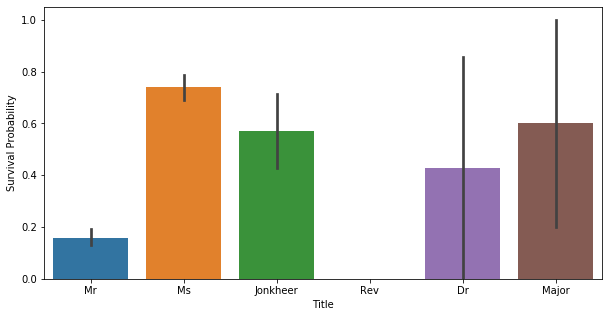

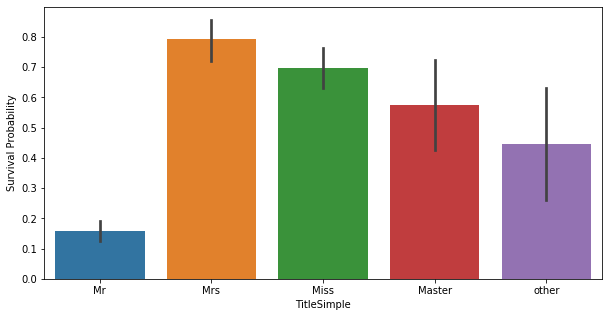

In [481]:
#我们查看各组的幸存率情况：
plt.figure(figsize=(10,5))
g=sns.barplot(data=train_df,x="Title",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()

plt.figure(figsize=(10,5))
g=sns.barplot(data=train_df,x="TitleSimple",y="Survived")
g.set_ylabel("Survival Probability")
plt.show()

In [479]:
testcorr('Title', 'c', True)
testcorr('TitleSimple', 'c', True)

 Score [5.92259337e-02 6.24922963e+00 9.87834340e-01 1.13325148e+02
 1.67703935e+02 4.36065574e+00]
Pvalue [8.07723593e-01 1.24247332e-02 3.20272257e-01 1.83139695e-26
 2.34784561e-38 3.67781458e-02]
 Score [  6.18042494  75.85558079 112.80578452  88.05039172   0.41932701]
Pvalue [1.29171252e-02 3.05188656e-18 2.37980506e-26 6.38080135e-21
 5.17273046e-01]


### 从Name中获取姓氏

In [482]:
def lastname_extract(word):
    return word.split(',')[0]

In [483]:
dfLastName = pd.DataFrame({'LastName':data['Name'].apply(lastname_extract)})

In [484]:
dfLastName.groupby('LastName').LastName.count() #较为分散，可以考虑是否使用

LastName
Abbing               1
Abbott               3
Abelseth             2
Abelson              2
Abrahamsson          1
Abrahim              1
Adahl                1
Adams                1
Ahlin                1
Aks                  2
Albimona             1
Aldworth             1
Alexander            1
Alhomaki             1
Ali                  2
Allen                2
Allison              4
Allum                1
Andersen             1
Andersen-Jensen      1
Anderson             1
Andersson           11
Andreasson           1
Andrew               2
Andrews              2
Angheloff            1
Angle                2
Appleton             1
Arnold-Franchi       2
Aronsson             1
                    ..
Wilhelms             1
Wilkes               1
Willard              1
Willer               1
Willey               1
Williams             5
Williams-Lambert     1
Wilson               1
Windelov             1
Wirz                 1
Wiseman              1
Wittevrongel         1
Wo

In [493]:
data['LastName'] = dfLastName #dfTitle #如果保留各类特殊称谓的话
train_df['LastName'] = train_df['Name'].apply(lastname_extract)
test_df['LastName'] = test_df['Name'].apply(lastname_extract)

In [492]:
testcorr('LastName', 'c', True)

 Score [0.62295082 0.11410699 0.11410699 0.62295082 0.62295082 0.62295082
 1.60526316 1.60526316 0.62295082 0.62295082 1.24590164 0.11410699
 0.03235548 0.62295082 1.60526316 1.60526316 0.99396031 0.62295082
 0.62295082 0.11410699 1.60526316 1.60526316 1.24590164 0.62295082
 0.62295082 2.26757981 1.60526316 1.24590164 1.60526316 0.62295082
 1.60526316 0.11410699 6.42105263 0.62295082 0.62295082 0.62295082
 1.60526316 0.62295082 1.60526316 1.24590164 1.60526316 1.60526316
 0.62295082 0.62295082 0.62295082 0.11410699 1.60526316 3.21052632
 0.62295082 3.21052632 3.21052632 1.60526316 1.60526316 0.62295082
 0.62295082 0.62295082 0.62295082 1.60526316 1.60526316 0.62295082
 3.21052632 1.60526316 1.60526316 0.62295082 1.60526316 1.60526316
 0.62295082 1.86885246 1.86885246 0.62295082 1.60526316 0.62295082
 1.60526316 1.24590164 0.62295082 0.62295082 2.26757981 0.62295082
 0.62295082 1.60526316 1.60526316 0.62295082 0.62295082 0.62295082
 1.60526316 1.24590164 0.62295082 1.60526316 3.21052632

### 去掉Name

In [62]:
data = data.drop(['Name'], axis=1)

In [ ]:
data.head()

## 数值化

In [70]:
for c1 in data.columns.values:
    print("%s: %s" %(c1, pd.api.types.infer_dtype(data[c1]) ) ) #得到列类型

Pclass: integer
Sex: string
Age: floating
SibSp: integer
Parch: integer
Fare: floating
Embarked: mixed
Title: string


D:\Miniconda3\envs\gluon\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  exec(code_obj, self.user_global_ns, self.user_ns)
